In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [355]:
df = pd.read_csv('training_v2.csv')

In [4]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

### Age Feature

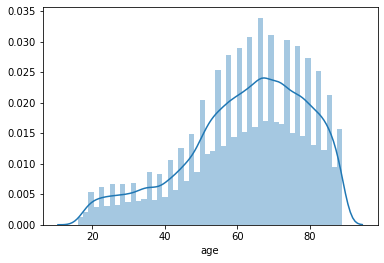

In [5]:
sns.distplot(df['age'].dropna())

In [34]:
#fill in age wil mean age
df['age'].fillna(value=df['age'].describe()['mean'], inplace=True)

### BMI, Height, Weight Features

In [57]:
df['bmi'].describe()

count    88284.000000
mean        29.185818
std          8.275142
min         14.844926
25%         23.641975
50%         27.654655
75%         32.930206
max         67.814990
Name: bmi, dtype: float64

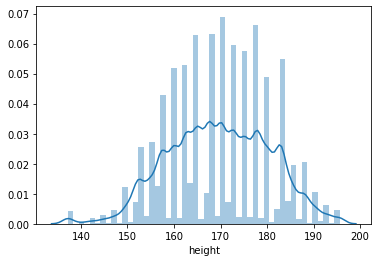

In [58]:
sns.distplot(df['height'].dropna())

In [76]:
df['height'].isna().sum()

1334

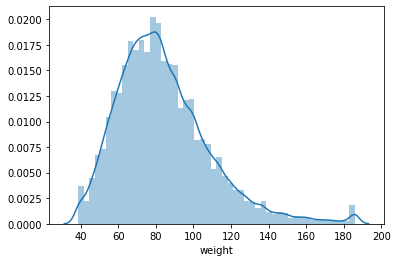

In [59]:
sns.distplot(df['weight'].dropna())

In [94]:
df.groupby('gender').mean()[['height', 'weight']]

,height,weight
gender,,
F,161.679830,77.277623
M,176.432256,89.785557


In [9]:
df.gender.value_counts(dropna=False)

M      49469
F      42219
NaN       25
Name: gender, dtype: int64

In [35]:
height_weight_by_gender = df.groupby('gender').mean()[['height', 'weight']]

In [36]:
average_height = height_weight_by_gender['height'].mean()

In [37]:
df[df['height']> average_height]

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.10,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.10,14.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,9

In [38]:
df.loc[(df['height']> average_height) & (df['gender'].isna()), 'gender'] = 'M'

In [39]:
df.loc[(df['height']< average_height) & (df['gender'].isna()), 'gender'] = 'F'

In [40]:
avg_height = height_weight_by_gender['height'].mean()
avg_weight = height_weight_by_gender['weight'].mean()

In [41]:
df.loc[(df['weight']> avg_weight) & (df['gender'].isna()), 'gender'] = 'M'
df.loc[(df['weight']< avg_weight) & (df['gender'].isna()), 'gender'] = 'F'

In [42]:
height_weight_by_gender['weight'].mean()

83.53159022175961

In [43]:
df['gender'].value_counts(dropna=False)

M      49483
F      42227
NaN        3
Name: gender, dtype: int64

In [44]:
df['gender'].fillna(value='M', inplace=True)

In [45]:
df['bmi'] = df['weight'] / (df['height']/100)**2

In [46]:
df['age'].fillna(value=df['age'].describe()['mean'], inplace=True)

In [356]:
# composite function to clean dataset
def impute_missing_values(df):
    
    #replace missing ages with mean 
    df['age'].fillna(value=df['age'].describe()['mean'], inplace=True)
    
    #find mean height and weight by gender
    height_weight_by_gender = df.groupby('gender').mean()[['height', 'weight']]
    avg_height = height_weight_by_gender['height'].mean()
    avg_weight = height_weight_by_gender['weight'].mean()
    
    #fill in missing gender based on average height and weight
    #where F are < average and M are > average
    df.loc[(df['height']> avg_height) & (df['gender'].isna()), 'gender'] = 'M'
    df.loc[(df['height']< avg_height) & (df['gender'].isna()), 'gender'] = 'F'
    df.loc[(df['weight']> avg_weight) & (df['gender'].isna()), 'gender'] = 'M'
    df.loc[(df['weight']< avg_weight) & (df['gender'].isna()), 'gender'] = 'F'
    
    #any patients without height or weight information are defaulted to M
    df['gender'].fillna(value='M', inplace=True)
    
    #fill in average height and weight based on patient gender
    df.loc[(df['gender'] == 'F') & (df['weight'].isna()), 'weight'] = height_weight_by_gender.loc['F']['weight']
    df.loc[(df['gender'] == 'F') & (df['height'].isna()), 'height'] = height_weight_by_gender.loc['F']['height']
    df.loc[(df['gender'] == 'M') & (df['weight'].isna()), 'weight'] = height_weight_by_gender.loc['M']['weight']
    df.loc[(df['gender'] == 'M') & (df['height'].isna()), 'height'] = height_weight_by_gender.loc['M']['height']
    df['bmi'] = df['weight'] / (df['height']/100)**2
    

In [357]:
x = ['albumin_apache','bilirubin_apache','fio2_apache','paco2_for_ph_apache', 'paco2_apache','pao2_apache','ph_apache',
'urineoutput_apache','d1_diasbp_invasive_max','d1_diasbp_invasive_min','d1_mbp_invasive_max','d1_mbp_invasive_min',
 'd1_sysbp_invasive_max','d1_sysbp_invasive_min','h1_diasbp_invasive_max','h1_diasbp_noninvasive_min','h1_mbp_invasive_max',
 'h1_mbp_invasive_min','h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_sysbp_invasive_max','h1_sysbp_invasive_min',
 'h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min','d1_albumin_max','d1_albumin_min','d1_bilirubin_max','d1_bilirubin_min',
 'd1_inr_max','d1_inr_min','d1_lactate_max','d1_lactate_min','h1_albumin_max','h1_albumin_min','h1_bilirubin_max',
 'h1_bilirubin_min','h1_bun_max','h1_bun_min','h1_calcium_max','h1_calcium_min','h1_creatinine_max','h1_creatinine_min',
 'h1_glucose_max','h1_glucose_min','h1_hco3_max','h1_hco3_min','h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max',
 'h1_hematocrit_min','h1_inr_max','h1_inr_min','h1_lactate_max','h1_lactate_min','h1_platelets_max','h1_platelets_min',
 'h1_potassium_max','h1_potassium_min','h1_sodium_max','h1_sodium_min' ,'h1_wbc_max','h1_wbc_min','d1_arterial_pco2_max',
 'd1_arterial_pco2_min' ,'d1_arterial_ph_max' ,'d1_arterial_ph_min','d1_arterial_po2_max','d1_arterial_po2_min',
 'd1_pao2fio2ratio_max','d1_pao2fio2ratio_min','h1_arterial_pco2_max','h1_arterial_pco2_min','h1_arterial_ph_max',
 'h1_arterial_ph_min','h1_arterial_po2_max','h1_arterial_po2_min','h1_pao2fio2ratio_max','h1_pao2fio2ratio_min','h1_diasbp_invasive_min' ]

In [358]:
df.drop(['icu_id','readmission_status','hospital_admit_source','encounter_id','patient_id','apache_3j_diagnosis'],axis=1, inplace=True)

In [359]:
df.drop(x, axis=1, inplace=True)

In [360]:
impute_missing_values(df)

In [361]:
# check for NAN values
round(df.isna().sum()/df.shape[0]*100, 2)

hospital_id                       0.00
hospital_death                    0.00
age                               0.00
bmi                               0.00
elective_surgery                  0.00
ethnicity                         1.52
gender                            0.00
height                            0.00
icu_admit_source                  0.12
icu_stay_type                     0.00
icu_type                          0.00
pre_icu_los_days                  0.00
weight                            0.00
apache_2_diagnosis                1.81
apache_post_operative             0.00
arf_apache                        0.78
bun_apache                       21.00
creatinine_apache                20.56
gcs_eyes_apache                   2.07
gcs_motor_apache                  2.07
gcs_unable_apache                 1.13
gcs_verbal_apache                 2.07
glucose_apache                   12.03
heart_rate_apache                 0.96
hematocrit_apache                21.67
intubated_apache         

In [320]:
df.isna().sum()

hospital_id                          0
hospital_death                       0
age                                  0
bmi                                  0
elective_surgery                     0
ethnicity                            0
gender                               0
height                               0
icu_admit_source                     0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
weight                               0
apache_2_diagnosis                1662
apache_post_operative                0
arf_apache                           0
gcs_eyes_apache                      0
gcs_motor_apache                     0
gcs_unable_apache                    0
intubated_apache                     0
map_apache                         994
resprate_apache                   1234
ventilated_apache                    0
d1_heartrate_max                     0
d1_heartrate_min                     0
d1_mbp_max               

In [362]:
#fill means
df.d1_heartrate_max.fillna(df.d1_heartrate_max.mean(),inplace=True)
df.d1_heartrate_min.fillna(df.d1_heartrate_min.mean(),inplace=True) 
df.d1_mbp_max.fillna(df.d1_mbp_max.mean(),inplace=True) 
df.d1_mbp_min.fillna(df.d1_mbp_min.mean(),inplace=True) 
df.d1_resprate_max.fillna(df.d1_resprate_max.mean(),inplace=True) 
df.d1_resprate_min.fillna(df.d1_resprate_min.mean(),inplace=True) 
df.d1_spo2_max.fillna(df.d1_spo2_max.mean(),inplace=True) 
df.d1_spo2_min.fillna(df.d1_spo2_min.mean(),inplace=True) 
df.d1_sysbp_max.fillna(df.d1_sysbp_max.mean(),inplace=True) 
df.d1_sysbp_min.fillna(df.d1_sysbp_min.mean(),inplace=True) 

In [363]:
#fill categoricals
df.ethnicity.fillna('Other/Unknown',inplace=True)
df.apache_3j_bodysystem.fillna('Other',inplace=True)

In [364]:
#fill numerical categories
df.gcs_eyes_apache.fillna(4.0, inplace=True)
df.gcs_motor_apache.fillna(6.0, inplace=True)
df.gcs_unable_apache.fillna(0.0, inplace=True)
df.intubated_apache.fillna(0.0, inplace=True)
df.arf_apache.fillna(0.0, inplace=True)
df.ventilated_apache.fillna(0.0, inplace=True)
df.aids.fillna(0.0, inplace=True)
df.cirrhosis.fillna(0.0, inplace=True)
df.diabetes_mellitus.fillna(0.0, inplace=True)
df.hepatic_failure.fillna(0.0, inplace=True)
df.immunosuppression.fillna(0.0, inplace=True)
df.leukemia.fillna(0.0, inplace=True)
df.lymphoma.fillna(0.0, inplace=True)
df.solid_tumor_with_metastasis.fillna(0.0, inplace=True)

In [365]:
df.loc[df.d1_temp_max.isna(),'d1_temp_max'] = df.loc[df.d1_temp_max.isna(),'temp_apache']
df.loc[df.d1_temp_min.isna(),'d1_temp_min'] = df.loc[df.d1_temp_min.isna(),'temp_apache']
df.loc[df.d1_temp_max.isna(),'d1_temp_max'] = df.loc[df.d1_temp_max.isna(),'h1_temp_max']
df.loc[df.d1_temp_min.isna(),'d1_temp_min'] = df.loc[df.d1_temp_min.isna(),'h1_temp_min']


#fillna
df.icu_admit_source.fillna('Other Hospital',inplace=True)


# #drop due to multicollinearity or duplicate
df.drop(['d1_diasbp_max','d1_diasbp_noninvasive_max','d1_mbp_noninvasive_max','d1_diasbp_min','d1_diasbp_noninvasive_min','d1_mbp_noninvasive_min','gcs_verbal_apache'],axis=1,inplace=True)
df.drop(['bun_apache','creatinine_apache','hematocrit_apache','sodium_apache','wbc_apache','glucose_apache','d1_hemaglobin_max','d1_hemaglobin_min','heart_rate_apache','apache_2_bodysystem'],axis=1,inplace=True)
df.drop(['temp_apache','h1_temp_max','h1_temp_min','h1_diasbp_noninvasive_max'],axis=1,inplace=True)



In [417]:
#impute median for the following column
cols = ['d1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 'h1_sysbp_max',
 'h1_sysbp_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_calcium_max',
 'd1_calcium_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_glucose_max',
 'd1_glucose_min',
 'd1_hco3_max',
 'd1_hco3_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_platelets_max',
 'd1_platelets_min',
 'd1_potassium_max',
 'd1_potassium_min',
 'd1_sodium_max',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'map_apache',
 'resprate_apache',
 'apache_4a_hospital_death_prob',
 'apache_4a_icu_death_prob',
'apache_2_diagnosis']

In [418]:
for col in cols:
    df[col].fillna(df[col].median(),inplace=True)

# One hot encode categorical

In [454]:
#floats that need to be converted to ints
float_2_int_cols = ['apache_2_diagnosis','arf_apache','gcs_eyes_apache','gcs_motor_apache','gcs_unable_apache',
                   'intubated_apache','ventilated_apache','aids','cirrhosis','diabetes_mellitus','hepatic_failure',
                   'immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis']
for col in float_2_int_cols:
    df[col] = df[col].astype(int)

In [462]:
categorical_cols = ['hospital_id','ethnicity','gender','icu_admit_source','icu_stay_type','icu_type','gcs_eyes_apache',
                   'gcs_motor_apache','apache_3j_bodysystem']
# hospital_id = 147 unique
# ethnicity = 6 unique
# gender = 2 unique
# icu_admit_source = 5 unique
# icu_stay_type = 3 unique
# apache_2_diagnosis = 44 unique
# icu_type = 8 unique
# gcs_eyes_apache = 4 unique
# gcs_motor_apache = 6 unique
# apache_3j_bodysystem = 12 unique
for col in categorical_cols:
    df[col] = df[col].astype(str)

dummies = pd.get_dummies(df[categorical_cols],drop_first=True)

In [469]:
df_dum = pd.concat([df,dummies],axis=1)

In [470]:
df_dum.drop(categorical_cols,axis=1,inplace=True)

In [473]:
from sklearn.model_selection import train_test_split

In [475]:
X = df_dum.drop('hospital_death',axis=1)
y = df_dum['hospital_death']

In [503]:
y.value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [476]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [505]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [507]:
GBC = GradientBoostingClassifier()

In [509]:
GBC.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [510]:
y_pred = GBC.predict(x_test)

In [511]:
accuracy_score(y_test, y_pred)

0.9321266968325792

In [512]:
f1_score(y_test, y_pred)

0.4085510688836104

## RANDOM FOREST

In [495]:
rfc = RandomForestClassifier(max_depth=20, n_estimators=100)

In [496]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [497]:
y_pred = rfc.predict(x_test)

In [498]:
from sklearn.metrics import f1_score, accuracy_score

In [500]:
accuracy_score(y_test, y_pred)

0.9307092623889222

In [501]:
f1_score(y_test, y_pred)

0.343830665978317

In [485]:
from sklearn.metrics import confusion_matrix

In [487]:
confusion_matrix(y_test, y_pred)

array([[16702,   166],
       [ 1178,   297]])

In [490]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [514]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test.values,y_test.values))

In [519]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [524]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Dense(128,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Dense(32,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Dense(16,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [525]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
             metrics=['acc'])

In [526]:
model.fit(train_dataset,validation_data=test_dataset,epochs=50)

Train for 1147 steps, validate for 287 steps
Epoch 1/50
1147/1147 [==============================] - 13s 11ms/step - loss: 44.3957 - acc: 0.5980 - val_loss: 11.9450 - val_acc: 0.8672
Epoch 2/50
1147/1147 [==============================] - 12s 10ms/step - loss: 5.7697 - acc: 0.8024 - val_loss: 2.5168 - val_acc: 0.9219
Epoch 3/50
1147/1147 [==============================] - 11s 9ms/step - loss: 1.5691 - acc: 0.8863 - val_loss: 1.0421 - val_acc: 0.8936
Epoch 4/50
1147/1147 [==============================] - 11s 9ms/step - loss: 0.6771 - acc: 0.9050 - val_loss: 0.4709 - val_acc: 0.9219
Epoch 5/50
1147/1147 [==============================] - 10s 9ms/step - loss: 0.4010 - acc: 0.9109 - val_loss: 0.3277 - val_acc: 0.9218
Epoch 6/50
1147/1147 [==============================] - 10s 9ms/step - loss: 0.3050 - acc: 0.9128 - val_loss: 0.2850 - val_acc: 0.9212
Epoch 7/50
1147/1147 [==============================] - 11s 10ms/step - loss: 0.2759 - acc: 0.9132 - val_loss: 0.3963 - val_acc: 0.9135
Epoch

In [528]:
y_pred = model.predict(test_dataset)

ValueError: Classification metrics can't handle a mix of binary and continuous targets